<a href="https://colab.research.google.com/github/Rajvardhan00/Basics-of-ML/blob/main/Using_Ensemble_Machine_Learning_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import os

DATASET_PATH = None

for root, dirs, files in os.walk("."):
    if "2750" in dirs:
        DATASET_PATH = os.path.join(root, "2750")
        break

print("Detected DATASET_PATH:", DATASET_PATH)
print("Classes:", os.listdir(DATASET_PATH))


Detected DATASET_PATH: ./2750
Classes: ['HerbaceousVegetation', 'AnnualCrop', 'Pasture', 'Highway', 'River', 'Residential', 'Industrial', 'PermanentCrop', 'Forest', 'SeaLake']


In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [49]:
def extract_features(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (64, 64))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    mean = np.mean(img, axis=(0, 1))
    std = np.std(img, axis=(0, 1))

    return np.concatenate([mean, std])


In [50]:
X, y = [], []

classes = sorted(os.listdir(DATASET_PATH))
print("Classes found:", classes)

for label, land_class in enumerate(classes):
    class_path = os.path.join(DATASET_PATH, land_class)

    if not os.path.isdir(class_path):
        continue

    for img_file in os.listdir(class_path)[:200]:  # limit for speed
        img_path = os.path.join(class_path, img_file)
        features = extract_features(img_path)

        X.append(features)
        y.append(label)

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


Classes found: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
X shape: (2000, 6)
y shape: (2000,)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [52]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel="rbf", probability=True)
gb = GradientBoostingClassifier()


In [53]:
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)
gb.fit(X_train, y_train)


GradientBoostingClassifier()

In [54]:
ensemble = VotingClassifier(
    estimators=[
        ("rf", rf),
        ("svm", svm),
        ("gb", gb)
    ],
    voting="soft"
)

ensemble.fit(X_train, y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('svm', SVC(probability=True)),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft')

In [55]:
models = {
    "Random Forest": rf,
    "SVM": svm,
    "Gradient Boosting": gb,
    "Ensemble Model": ensemble
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Random Forest
Accuracy: 0.655
              precision    recall  f1-score   support

           0       0.68      0.64      0.66        36
           1       0.87      0.85      0.86        47
           2       0.69      0.43      0.53        46
           3       0.23      0.19      0.21        36
           4       0.76      0.91      0.83        34
           5       0.66      0.74      0.69        34
           6       0.48      0.70      0.57        33
           7       0.71      0.84      0.77        44
           8       0.43      0.38      0.40        48
           9       0.95      0.90      0.93        42

    accuracy                           0.66       400
   macro avg       0.65      0.66      0.64       400
weighted avg       0.65      0.66      0.65       400


SVM
Accuracy: 0.5525
              precision    recall  f1-score   support

           0       0.70      0.44      0.54        36
           1       0.78      0.89      0.83        47
           2       0.68  

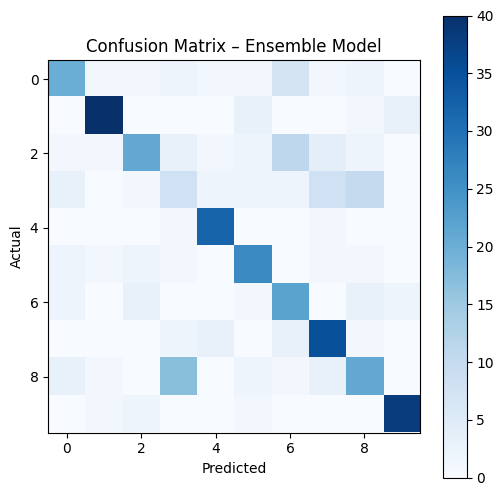

In [56]:
cm = confusion_matrix(y_test, ensemble.predict(X_test))

plt.figure(figsize=(6,6))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix – Ensemble Model")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [57]:
from skimage.feature import graycomatrix, graycoprops

def extract_features(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (64, 64))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Color statistics
    mean = np.mean(img_rgb, axis=(0, 1))
    std = np.std(img_rgb, axis=(0, 1))

    # HSV histogram
    hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
    hist = cv2.calcHist([hsv], [0, 1], None, [8, 8], [0, 180, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()

    # Texture features (GLCM)
    glcm = graycomatrix(img_gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]

    return np.concatenate([mean, std, hist, [contrast, homogeneity]])


In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [63]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)

svm = SVC(
    kernel="rbf",
    C=10,
    gamma="scale",
    probability=True
)

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    random_state=42
)


In [64]:
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)
gb.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.05, n_estimators=200,
                           random_state=42)

In [65]:
ensemble = VotingClassifier(
    estimators=[
        ("rf", rf),
        ("svm", svm),
        ("gb", gb)
    ],
    voting="soft",
    weights=[2, 1, 3]
)

ensemble.fit(X_train, y_train)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=300,
                                                     random_state=42)),
                             ('svm', SVC(C=10, probability=True)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         n_estimators=200,
                                                         random_state=42))],
                 voting='soft', weights=[2, 1, 3])

In [66]:
from sklearn.metrics import accuracy_score, f1_score

print("FINAL MODEL PERFORMANCE\n")
print("{:<20} {:<10} {:<12} {:<12}".format(
    "Model", "Accuracy", "F1 (Macro)", "F1 (Weighted)"
))

models = {
    "Random Forest": rf,
    "SVM": svm,
    "Gradient Boosting": gb,
    "Ensemble Model": ensemble
}

for name, model in models.items():
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")
    f1_weighted = f1_score(y_test, y_pred, average="weighted")

    print("{:<20} {:.4f}     {:.4f}       {:.4f}".format(
        name, acc, f1_macro, f1_weighted
    ))


FINAL MODEL PERFORMANCE

Model                Accuracy   F1 (Macro)   F1 (Weighted)
Random Forest        0.6575     0.6485       0.6507
SVM                  0.7000     0.6956       0.6985
Gradient Boosting    0.6475     0.6432       0.6456
Ensemble Model       0.6650     0.6573       0.6607
